In [1]:
import torch
from molscribe import MolScribe
from huggingface_hub import hf_hub_download
import json
import cv2
import torch
import matplotlib.pyplot as plt
import rdkit.Chem as Chem
from rdkit.Chem import Draw
from PIL import Image 
import io
import os
import re
from IPython.display import display, Image as IPythonImage
import getReactionNumber
import random
import numpy as np
import json
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg
IMAGE_PATH = 'imgs/Benzilicacidrearrangement.png'



In [2]:
device = torch.device('cpu')
ckpt_path = hf_hub_download('yujieq/MolScribe', 'swin_base_char_aux_1m.pth')
model = MolScribe(ckpt_path, device=device)

# Predict structure
prediction = model.predict_image_file(IMAGE_PATH, return_atoms_bonds=True)
# smiles = prediction['smiles']
# molfile = prediction['molfile']
IMAGE_FOLDER = "/home/ctleungaf/ChemEagle/images_t/images_test/"


# Read the image using OpenCV
cv_image = cv2.imread(IMAGE_PATH)
# model.generate_synthetic_data(IMAGE_FOLDER)

/home/ctleungaf/anaconda3/envs/chemext/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/home/ctleungaf/anaconda3/envs/chemext/lib/python3.8/site-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


In [5]:
number_image, arrow_image ,_,_, atom_json = model.syn_draw_prediction_number(prediction, IMAGE_PATH)


Saved number image to: imgs/number/Benzilicacidrearrangement.png
Saved arrow image to: imgs/synthetic/Benzilicacidrearrangement.png


In [4]:
print(atom_json)

{'Benzilicacidrearrangement.png': {'step 1': {'start': 3, 'end': 5}, 'step 2': {'start': 30, 'end': 29}, 'step 3': {'start': 34, 'end': 32}, 'step 4': {'start': 43, 'end': 44}}}


In [ ]:
_,_,_, arrow_json = model.syn_draw_prediction_number(prediction,cv_image)

/home/ctleungaf/anaconda3/envs/chemext/lib/python3.8/site-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/ctleungaf/anaconda3/envs/chemext/lib/python3.8/site-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/ctleungaf/anaconda3/envs/chemext/lib/python3.8/site-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/ctleungaf/anaconda3/envs/chemext/lib/python3.8/site-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the input

: 

Using CPU. Note: This module is much faster with a GPU.


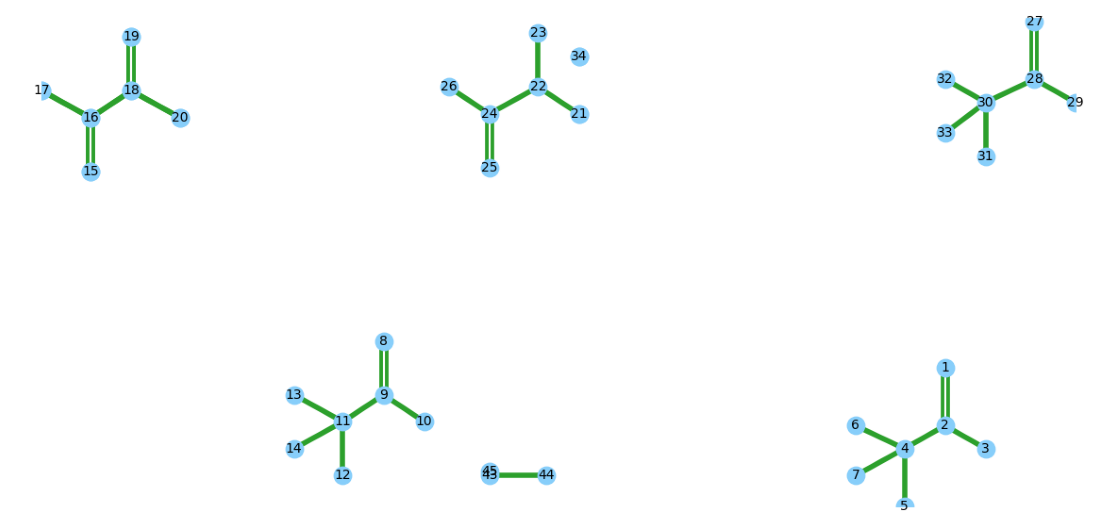

In [ ]:
getReactionNumber.getNumber(IMAGE_PATH)

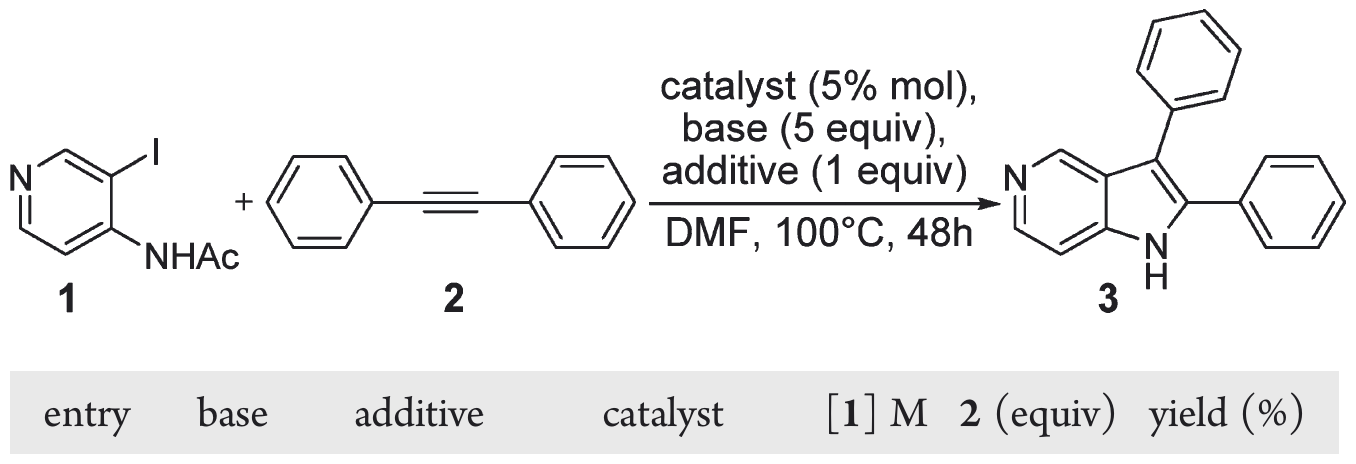

In [ ]:
original = cv2.imread(IMAGE_PATH)
original = Image.fromarray(original)
original

In [ ]:
from openai import AzureOpenAI
import base64

# Read API key
with open('api_key.txt', 'r') as api_key_file:
    API_KEY = api_key_file.read()

# Read image file
def encode_image(image_path: str):
    '''Returns a base64 string of the input image.'''
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

#image_path = 'C:\\programming\\urop\\images_t\\images_test\\ja9810742-Table-c2.png' 
image_path = IMAGE_PATH
base64_image = encode_image(image_path)

# Read prompt
with open('./prompts/prompt_electron_info.txt', 'r') as prompt_file:
    prompt = prompt_file.read()
print(prompt)

# Set up client
client = AzureOpenAI(
    api_key = API_KEY,
    api_version = '2024-06-01',
    azure_endpoint = 'https://hkust.azure-api.net',
)

You are an expert assistant in analyzing reaction mechanisms from chemistry reaction diagrams. This image contains a multi-step reaction mechanism with electron movements and bond formation events. Use the tool to generate a number-labelle image which provides atom numbering and connectivity information, which will be used for precise atom-to-atom mapping.
Requirements:
    Extract Mechanistic Steps:
        Identify each electron movement in the reaction mechanism.
        Determine bond formations and bond cleavages.
    Map Atoms Using Number Labels:
        Use the atom numbering from the second image to reference each atom.
        Ensure that each electron movement is described with atom numbers.
        Describe the Reaction Mechanism in a Structured Format:
    Each step must specify:
        The electron donor and acceptor atoms.
        Any new bond formations or bond cleavages.
    Generate the Output as a Structured JSON:
    Include the full reaction sequence with atom-spe

In [ ]:
tools = [
    {
        'type': 'function',
        'function': {
            "name": "getNumber",
            "description": "Extracts atom numbers from a reaction image using MolScribe and RxnScribe for graph and text recognition. Returns an annotated image with numbered atoms.",
            "parameters": {
                "type": "object",
                "properties": {
                    "image_path": {
                        "type": "string",
                        "description": "Path to the reaction image file."
                    }
                },
                "required": ["image_path"],
                "additionalProperties": False
            },
            "returns": {
                "image": "Annotated reaction image with numbered atoms."
            }
        }
    }
]

In [ ]:
response = client.chat.completions.create(
    model='gpt-4o',
    temperature=0,
    response_format={"type": "json_object"},
    messages=[
        {'role': 'system', 'content': 'You are a helpful assistant.'},
        {
            'role': 'user',
            'content': [
                {
                    'type': 'text',
                    'text': prompt
                },
                {
                    'type': 'image_url',
                    'image_url': {
                        'url': f'data:image/png;base64,{base64_image}'
                    }
                }
            ]
        },
    ],
    tools=tools,
)

In [ ]:
print(response)

ChatCompletion(id='chatcmpl-B6yYnWd5IPQvdWYRY6b7PtNG0Udhz', choices=[Choice(finish_reason='tool_calls', index=0, logprobs=None, message=ChatCompletionMessage(content='', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=[ChatCompletionMessageToolCall(id='call_HTHtsDbI3kvt04Sg4nR0DYPt', function=Function(arguments='{"image_path":"reaction_diagram.png"}', name='getNumber'), type='function')]), content_filter_results={})], created=1741002461, model='gpt-4o-2024-08-06', object='chat.completion', service_tier=None, system_fingerprint='fp_b705f0c291', usage=CompletionUsage(completion_tokens=18, prompt_tokens=1178, total_tokens=1196, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0)), prompt_filter_results=[{'prompt_index': 0, 'content_filter_result': {'jailbreak': {'filtered': False, 'detected': Fa

In [ ]:
if hasattr(response, "tool_calls") and response.tool_calls:
    for tool_call in response.tool_calls:
        function_name = tool_call.function.name
        function_args = json.loads(tool_call.function.arguments)
        
        if function_name == "getNumber":
            print("\n🔹 Model called the function:", function_name)
            print("🔹 Arguments:", function_args)
            
            # Execute getNumber function with the extracted arguments
            tool_response = getReactionNumber.getNumber(**function_args)
            
            # Display the tool response (Annotated Image)
            print("\nSuccessfully executed getNumber.")
            if isinstance(tool_response, Image.Image):
                tool_response.show()  # Show the annotated image
                tool_response.save("annotated_reaction.png")  # Save the result
                print("📂 Annotated reaction image saved as 'annotated_reaction.png'")
            else:
                print("Unexpected response format:", tool_response)

else:
    print("\n⚠️ No tool function was called by the model.")


⚠️ No tool function was called by the model.


In [ ]:
if function_name == "getNumber":
    print("\n🔹 Model called the function:", function_name)
    print("🔹 Arguments before override:", function_args)
    
    # Override the model's image_path with the correct one
    function_args["image_path"] = IMAGE_PATH  # Use the correct image path
    
    print("🔹 Using correct image path:", function_args["image_path"])

    # Execute getNumber function with the corrected arguments
    tool_response = getReactionNumber.getNumber(**function_args)


NameError: name 'function_name' is not defined

In [ ]:
print({
  "reaction_mechanism": [
    {
      "step": 1,
      "electron_flow": {
        "from": "Cr3+-C bond (atom 22 and 23)",
        "to": "atom 12"
      },
      "bond_formation": ["Breaks C-Cr3+ bond"]
    },
    {
      "step": 2,
      "electron_flow": {
        "from": "π-electrons in C=O bond (atom 12 and atom 13)",
        "to": "Oxygen lone pair on atom 13"
      },
      "bond_formation": ["Forms C-O bond (atom 6 and 7)"]
    },
    {
      "step": 3,
      "electron_flow": {
        "from": "Cr3+-C bond (atom 8 and 9)",
        "to": "Forms π-bond between atoms 2 and 3"
      },
      "bond_formation": ["New C=C double bond (atom 2 and 3)"]
    },
    {
      "step": 4,
      "electron_flow": {
        "from": "C-O bond (atom 6 and 7)",
        "to": "Cr center (CrCl2) in atom group 7"
      },
      "bond_formation": ["Forms Cr-O bond"]
    }
  ]
})


{'reaction_mechanism': [{'step': 1, 'electron_flow': {'from': 'Cr3+-C bond (atom 22 and 23)', 'to': 'atom 12'}, 'bond_formation': ['Breaks C-Cr3+ bond']}, {'step': 2, 'electron_flow': {'from': 'π-electrons in C=O bond (atom 12 and atom 13)', 'to': 'Oxygen lone pair on atom 13'}, 'bond_formation': ['Forms C-O bond (atom 6 and 7)']}, {'step': 3, 'electron_flow': {'from': 'Cr3+-C bond (atom 8 and 9)', 'to': 'Forms π-bond between atoms 2 and 3'}, 'bond_formation': ['New C=C double bond (atom 2 and 3)']}, {'step': 4, 'electron_flow': {'from': 'C-O bond (atom 6 and 7)', 'to': 'Cr center (CrCl2) in atom group 7'}, 'bond_formation': ['Forms Cr-O bond']}]}
